In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data = pd.read_csv("C:/Users/KHALID/Downloads/50_Startups.csv")

In [4]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data1 = data.rename({'R&D Spend':'RDS', 'Administration':'ADMN', 'Marketing Spend':'MS' }, axis=1)

In [7]:
data1

,RDS,ADMN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
data1[data1.duplicated()]

,RDS,ADMN,MS,State,Profit


In [9]:
data1.describe()

,RDS,ADMN,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
data1.corr()

,RDS,ADMN,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMN,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


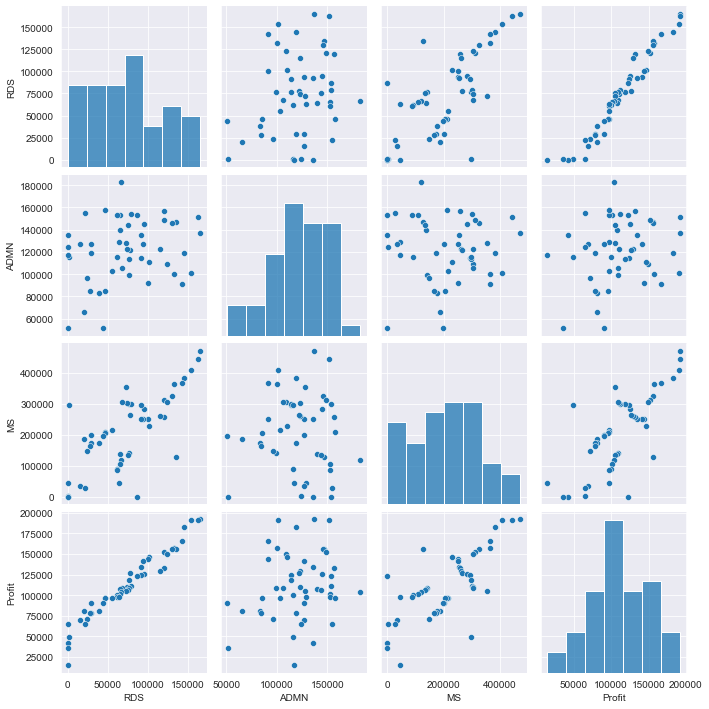

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [12]:
model = smf.ols('Profit~RDS+ADMN+MS', data=data1).fit()

In [13]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMN            -0.026816
MS               0.027228
dtype: float64

In [14]:
model.tvalues

Intercept     7.626218
RDS          17.846374
ADMN         -0.525507
MS            1.655077
dtype: float64

In [15]:
np.round(model.pvalues, 5)

Intercept    0.00000
RDS          0.00000
ADMN         0.60176
MS           0.10472
dtype: float64

In [16]:
model.rsquared

0.9507459940683246

In [17]:
model.rsquared_adj

0.9475337762901719

In [18]:
slr_a = smf.ols('Profit~ADMN', data=data1).fit()

In [19]:
slr_a.tvalues

Intercept    3.040044
ADMN         1.419493
dtype: float64

In [20]:
slr_a.pvalues

Intercept    0.003824
ADMN         0.162217
dtype: float64

In [21]:
slr_m = smf.ols('Profit~MS', data=data1).fit()

In [22]:
slr_m.tvalues

Intercept    7.808356
MS           7.802657
dtype: float64

In [23]:
slr_m.pvalues

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64

In [24]:
mlr_am = smf.ols('Profit~ADMN+MS', data=data1).fit()

In [25]:
mlr_am.tvalues

Intercept    1.142741
ADMN         2.467779
MS           8.281039
dtype: float64

In [26]:
mlr_am.pvalues

Intercept    2.589341e-01
ADMN         1.729198e-02
MS           9.727245e-11
dtype: float64

In [27]:
rsq_r = smf.ols('RDS~ADMN+MS', data=data1).fit().rsquared

In [28]:
vif_r = 1/(1-rsq_r)

In [29]:
rsq_a = smf.ols('ADMN~RDS+MS', data=data1).fit().rsquared

In [30]:
vif_a = 1/(1-rsq_a)

In [31]:
rsq_m = smf.ols('MS~ADMN+RDS', data=data1).fit().rsquared

In [32]:
vif_m = 1/(1-rsq_m)

In [33]:
d1 = {'Variables': ['RDS', 'ADMN', 'MS'], 'VIF': [vif_r, vif_a, vif_m]}

In [34]:
Vif_df = pd.DataFrame(d1)
Vif_df

,Variables,VIF
0,RDS,2.468903
1,ADMN,1.175091
2,MS,2.326773


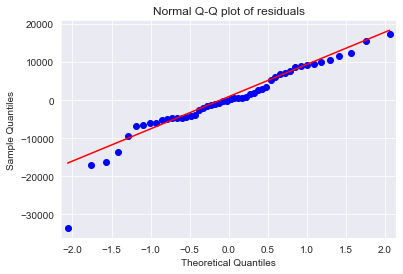

In [35]:
sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [36]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [37]:
def standard_values(vals):
    return(vals-vals.mean())/vals.std()

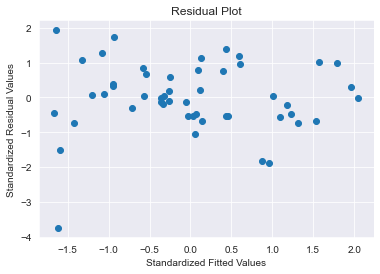

In [38]:
plt.scatter(standard_values(model.fittedvalues), standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

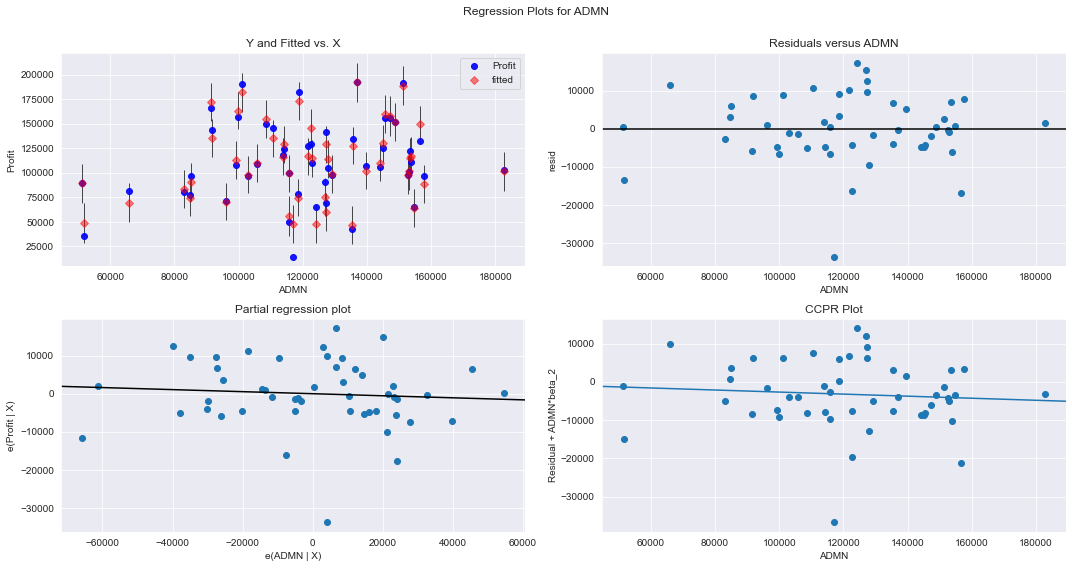

In [39]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'ADMN', fig = fig)
plt.show()

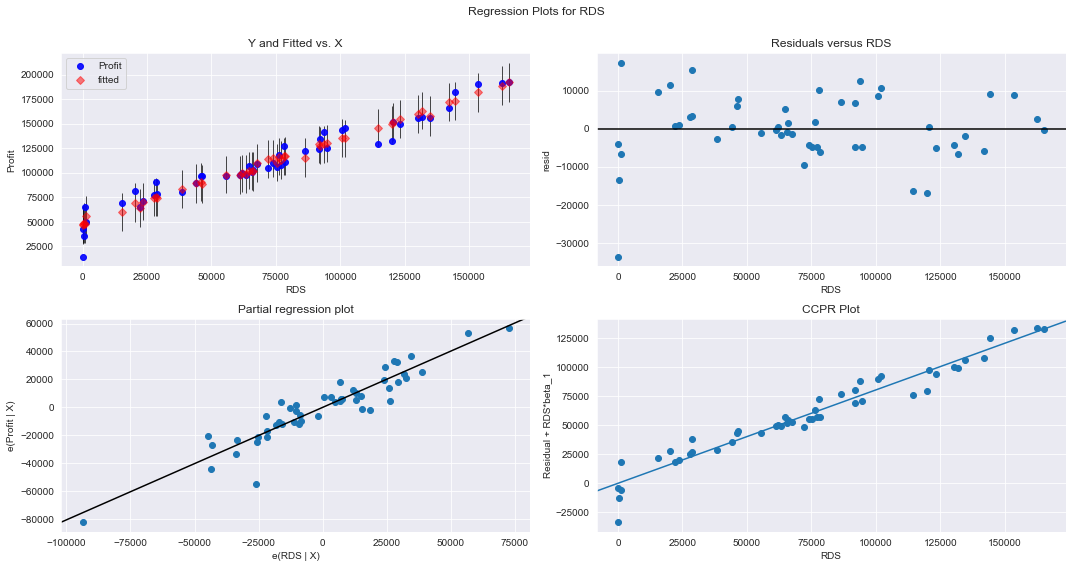

In [40]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'RDS', fig=fig)
plt.show()

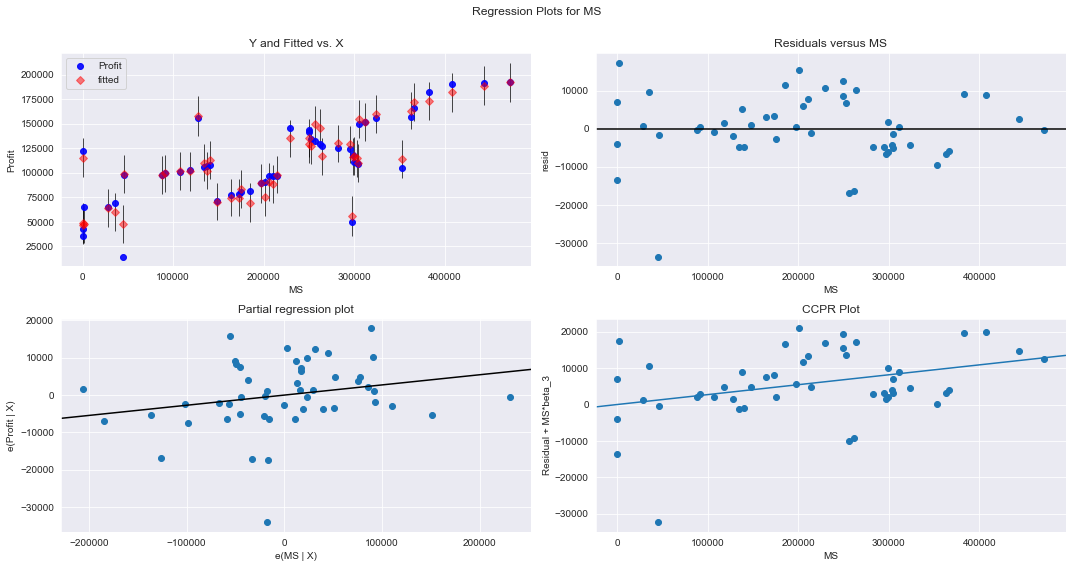

In [41]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'MS', fig=fig)
plt.show()

In [42]:
(c, _) = model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

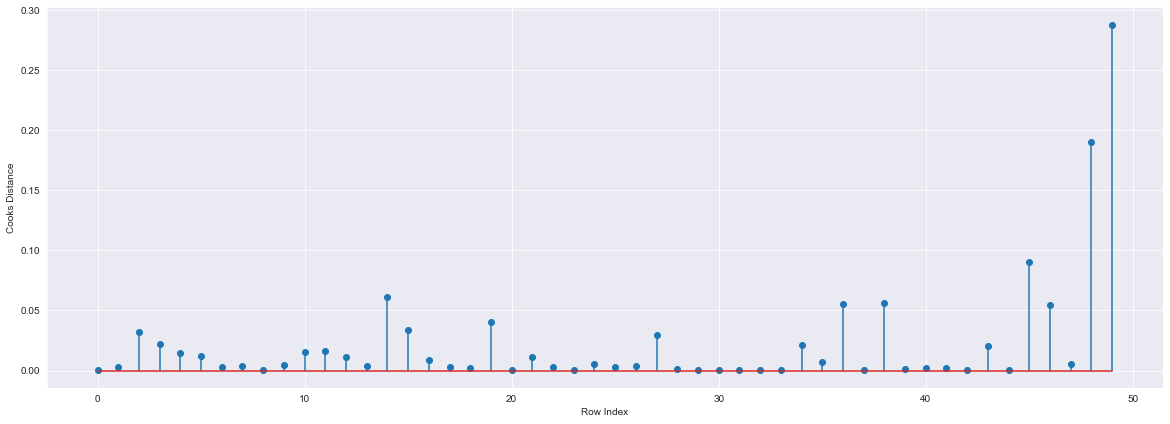

In [43]:
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)), np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
np.argmax(c), np.max(c)

(49, 0.28808229275432584)

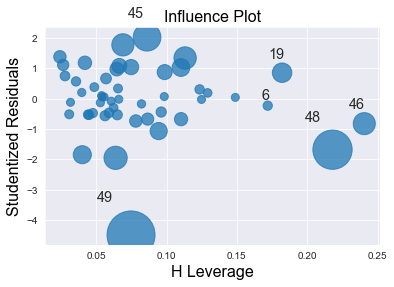

In [45]:
influence_plot(model)
plt.show()

In [46]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [47]:
data1[data1.index.isin([49])]

,RDS,ADMN,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [48]:
data2 = data1.drop(data1.index[[49]], axis=0).reset_index(drop=True)
data2

,RDS,ADMN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [65]:
model2 = smf.ols('Profit~RDS+ADMN+MS', data=data2).fit()

In [66]:
while model2.rsquared < 0.99:
    for c  in [np.max(c)>1]:
        model2 = smf.ols('Profit~RDS+ADMN+MS', data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c), np.max(c)
        data2 = data2.drop(data2.index[[np.argmax(c)]], axis=0).reset_index(drop=True)
        data2
    else:
            final_model = smf.ols('Profit~RDS+ADMN+MS', data=data2).fit()
            final_model.rsquared, final_model.aic
            print('Thus model  accuracy is improved to', final_model.rsquared)

Thus model  accuracy is improved to 0.9888345574468181
Thus model  accuracy is improved to 0.9920986695389129
Thus model  accuracy is improved to 0.993811942529795


In [67]:
final_model.rsquared

0.993811942529795

In [68]:
data2

,RDS,ADMN,MS,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,94657.16,145077.58,282574.31,New York,125370.37
6,91749.16,114175.79,294919.57,Florida,124266.90
7,76253.86,113867.30,298664.47,California,118474.03
8,67532.53,105751.03,304768.73,Florida,108733.99
9,77044.01,99281.34,140574.81,New York,108552.04


In [63]:
new_data = pd.DataFrame({'RDS':70000, 'ADMN':90000, 'MS':140000}, index=[0])
new_data

,RDS,ADMN,MS
0,70000,90000,140000


In [69]:
final_model.predict(new_data)

0    105184.324405
dtype: float64

In [71]:
pred_y = final_model.predict(data2)
pred_y

0     165496.557832
1     158097.147683
2     155955.061023
3     148512.005960
4     149881.506234
5     128774.876731
6     126841.287592
7     115832.552591
8     109707.758001
9     110363.122767
10    101755.559349
11    109324.943161
12    102435.727097
13    101414.664901
14     97854.703234
15     97491.406594
16     97325.115096
17     97661.327937
18     88281.378708
19     83805.740303
20     77019.574600
21     75758.566136
22     72198.367774
23     67257.038697
dtype: float64

In [73]:
d2 = {'Prep_Models':['Model', 'Final_Model'], 'Rsquared':[model.rsquared, final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.993812
